# MLP for MNIST Classification with Keras

This notebook builds, trains, and evaluates a **Multi-Layer Perceptron (MLP)** neural network using TensorFlow/Keras. The goal is to classify handwritten digits from the famous **MNIST dataset**. 

The process covers the complete machine learning pipeline:
1.  **Data Loading & Visualization:** Load the MNIST dataset and visualize some sample images.
2.  **Preprocessing:** Flatten, normalize, and one-hot encode the data.
3.  **Model Building:** Define the MLP architecture with Dense and Dropout layers.
4.  **Training:** Compile and train the model on the training data.
5.  **Evaluation:** Assess the model's performance on the test set and plot the learning curves.
6.  **Prediction:** Use the trained model to make predictions on new images.

In [1]:
# Import necessary libraries for numerical operations, deep learning, and plotting.
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Set a random seed for NumPy to ensure the results are reproducible.
np.random.seed(1000)

## 1. Load and Visualize MNIST Data

We'll start by loading the MNIST dataset, which is conveniently included with Keras. It's already split into training and testing sets. We'll also plot some random samples to get a feel for the data we're working with.

Train labels:  {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}


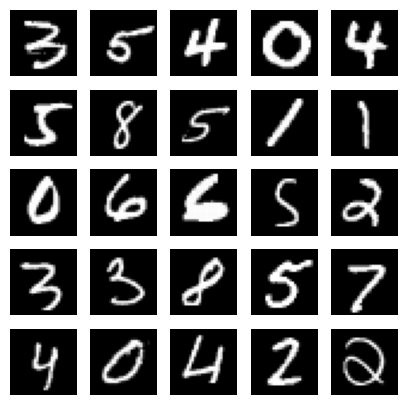

In [2]:
# Load the pre-shuffled MNIST dataset.
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

# Count the number of unique training labels to see the distribution of digits.
unique, counts = np.unique(y_train_raw, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# Select 25 random indexes from the training dataset.
indexes = np.random.randint(0, x_train_raw.shape[0], size=25)
images = x_train_raw[indexes]
labels = y_train_raw[indexes]

# Create a 5x5 subplot to plot the 25 sample digits.
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    # Display the image in grayscale.
    plt.imshow(image, cmap='gray')
    # Remove the axes for a cleaner look.
    plt.axis('off')
plt.show()

## 2. Data Preprocessing

Before feeding the data into our neural network, we need to perform three key preprocessing steps:
1.  **Flattening:** Convert each 28x28 pixel image into a 1D vector of 784 pixels.
2.  **Normalization:** Scale the pixel values from their original range of `[0, 255]` to `[0.0, 1.0]`. This helps the training process converge faster.
3.  **One-Hot Encoding:** Convert the integer labels (e.g., `5`) into binary vectors (e.g., `[0,0,0,0,0,1,0,0,0,0]`). This is required for the `categorical_crossentropy` loss function.

In [3]:
# --- One-Hot Encode Labels ---
num_labels = len(np.unique(y_train_raw))
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

# --- Flatten and Normalize Images ---
image_size = x_train_raw.shape[1]
input_size = image_size * image_size

x_train = np.reshape(x_train_raw, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test_raw, [-1, input_size])
x_test = x_test.astype('float32') / 255

print(f"Original training label for sample 0: {y_train_raw[0]}")
print(f"One-hot encoded training label for sample 0: {y_train[0]}")
print(f"Training data shape after preprocessing: {x_train.shape}")

Original training label for sample 0: 5
One-hot encoded training label for sample 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Training data shape after preprocessing: (60000, 784)


## 3. Build the Multi-Layer Perceptron (MLP) Model

We'll create a simple MLP with two hidden layers using Keras's `Sequential` API.
- **Dense Layers:** These are fully connected layers.
- **ReLU Activation:** The Rectified Linear Unit is a common and effective activation function for hidden layers.
- **Dropout:** This is a regularization technique to prevent overfitting. It randomly deactivates a fraction of neurons during training.
- **Softmax Activation:** The output layer uses softmax to produce a probability distribution across the 10 digit classes.

In [4]:
# Define model hyperparameters.
batch_size = 128
hidden_units = 256
dropout = 0.45

# Create a Sequential model.
model = Sequential()
# First hidden layer.
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# Second hidden layer.
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# Output layer.
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Print a summary of the model's architecture.
model.summary()

d:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile and Train the Model

Before training, we need to compile the model, specifying the loss function, optimizer, and metrics. We'll also use an **EarlyStopping** callback to stop training automatically if the model's performance on the validation set stops improving.

In [5]:
# Compile the model.
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Define an EarlyStopping callback.
# It will monitor the validation loss ('val_loss').
# 'patience=2' means it will stop if the loss doesn't improve for 2 consecutive epochs.
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Train the model.
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=batch_size, 
                    validation_split=0.2, # Use 20% of training data for validation
                    callbacks=[early_stopping_callback])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.4683 - val_accuracy: 0.9514 - val_loss: 0.1651
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9368 - loss: 0.2135 - val_accuracy: 0.9643 - val_loss: 0.1191
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9507 - loss: 0.1636 - val_accuracy: 0.9694 - val_loss: 0.1012
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1388 - val_accuracy: 0.9725 - val_loss: 0.0908
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1222 - val_accuracy: 0.9725 - val_loss: 0.0927
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.1094 - val_accuracy: 0.9760 - val_loss: 0.0852
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1015 - val_accuracy: 0.9760 - val_loss: 0.0865
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0930 - val_accuracy: 0.

## 5. Evaluate Model Performance

After training, we evaluate the model on the unseen test data to get a final measure of its accuracy. We also plot the training and validation loss/accuracy curves to visually assess the training process.


Test accuracy: 98.05%


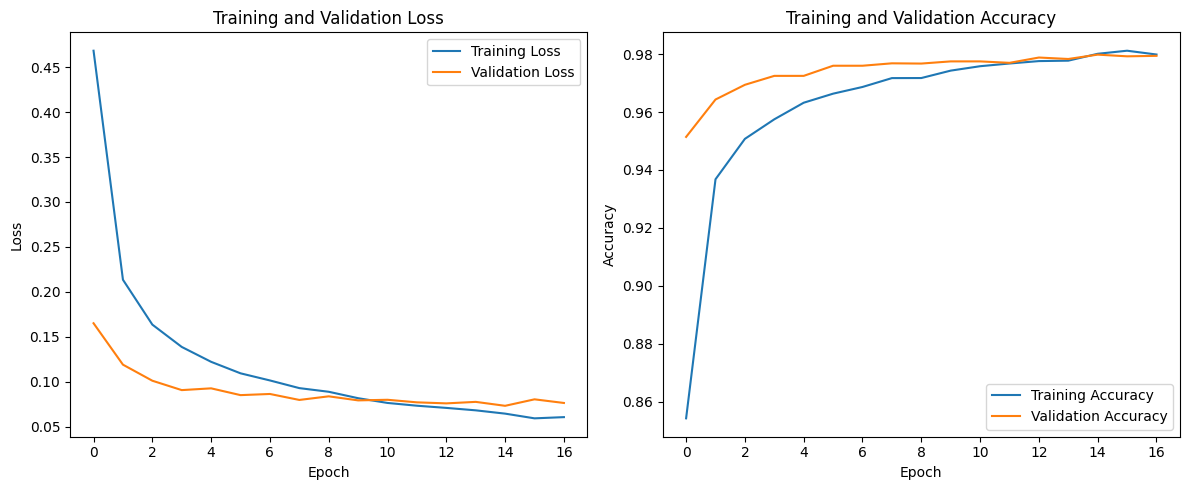

In [6]:
# Evaluate the model's performance on the test data.
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"\nTest accuracy: {100.0 * acc:.2f}%")

# --- Plot Training History ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training and validation loss.
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy.
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Prediction on Test Images

Finally, let's look at some individual predictions. We'll take a few images from the test set, have the model predict their labels, and visualize the results. Correct predictions will be labeled in green, and incorrect ones in red.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


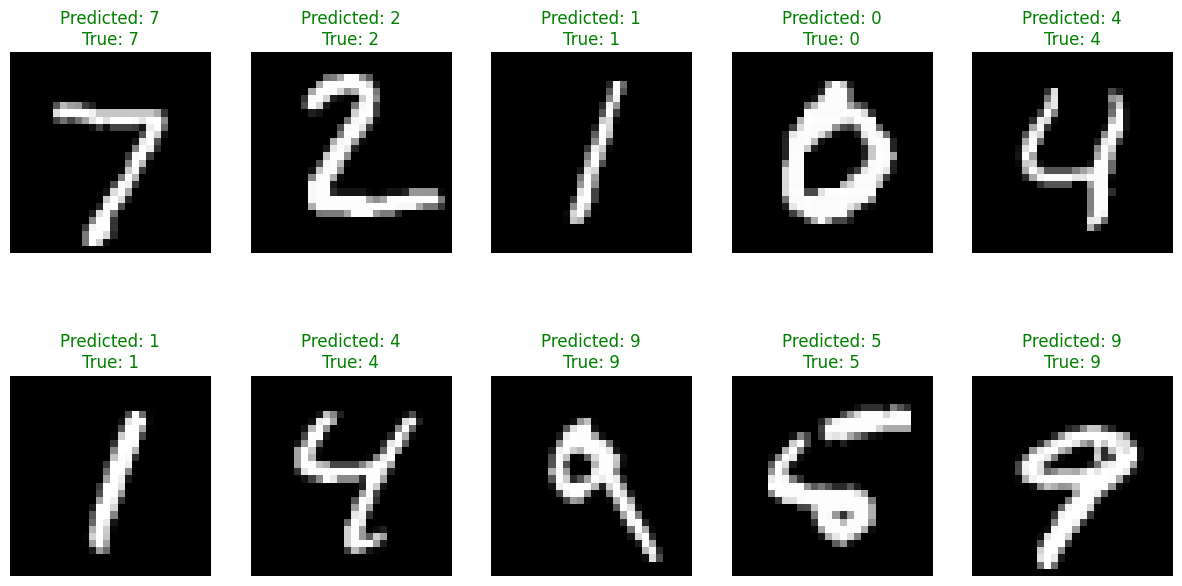

In [7]:
# Make predictions on the first 10 samples of the test data.
predictions = model.predict(x_test[:10])

# Get the predicted digit by finding the index with the highest probability.
predicted_labels = tf.argmax(predictions, axis=1)
# Get the true digit labels.
true_labels = tf.argmax(y_test[:10], axis=1)

# --- Visualize Predictions ---
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
fig.subplots_adjust(hspace=0.5)

# Reshape the test data back to 28x28 images for plotting.
x_test_images = x_test_raw[:10]

for i, ax in enumerate(axs.flat):
    # Plot the image.
    ax.imshow(x_test_images[i], cmap='gray')
    
    # Get the predicted and true labels.
    pred_label = predicted_labels[i].numpy()
    true_label = true_labels[i].numpy()

    # Set the title color to green for correct predictions and red for incorrect ones.
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Predicted: {pred_label}\nTrue: {true_label}", color=color)
    ax.axis('off')

plt.show()